In [2]:
# From the frequency response data, get the values of damping, modal force, natural frequency and non-linear stiffness
# using the geneticalgorithm2 library

In [3]:
!rm -rf non_linear_beam
!git clone https://github.com/catarinaluz/non_linear_beam.git
!pip install geneticalgorithm2

Cloning into 'non_linear_beam'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 513 (delta 65), reused 118 (delta 34), pack-reused 362
Receiving objects: 100% (513/513), 13.85 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (192/192), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.0 MB/s eta 0:00:00


In [9]:
from non_linear_beam.code.module.nonlinearprocess import get_frequency_data, get_frf,perform_optimization, set_file_name
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dir = "/content/non_linear_beam/Experimental Data/"
frf_mec_dir_010g = set_file_name(dir, acc = 0.10, time = False, mec = True)

In [8]:
freq_010g_mec, amplitude_010g_mec_sweepup = get_frequency_data(frf_mec_dir_010g)
_, amplitude_010g_mec_sweepdown = get_frequency_data(frf_mec_dir_010g, sweep_up= False)

/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(



Set: Average time of function evaluating (secs): 0.137775559425354 (total = 6.8887779712677)

Best score before optimization: 3.504456948225058e-05
                                                                                                                                                                                                        
 The best found solution:
 [6.14104746e+11 1.52979722e+00 8.98164047e+02 1.57342770e+00]

 Objective function:
 1.7234206669737e-07

 Used generations: 30
 Used time: 166 seconds


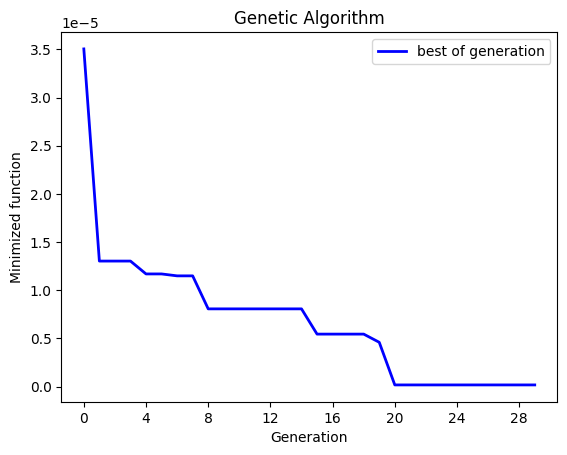

In [17]:
bounds = np.array([[4e11, 1e12],          # beta (knl)
                   [1.5, 2.5],              # fm
                   [135*2*np.pi, 150*2*np.pi],  # w0
                   [0.5, 3.5]])               # gamma

# Example of how you might call perform_optimization
ga_model = perform_optimization(freq_array=freq_010g_mec,
                                amp_array=amplitude_010g_mec_sweepup,
                                acc=0.1,
                                boundaries=bounds,
                                alg_params={'max_num_iteration': 30,
                                            'population_size': 50,
                                            'mutation_probability': 0.1,
                                            'elit_ratio': 0.01,
                                            'crossover_probability': 1,
                                            'parents_portion': 0.2,
                                            'crossover_type': 'two_point',
                                            'mutation_type': 'uniform_by_center',
                                            'selection_type': 'roulette',
                                            'max_iteration_without_improv': 10})

In [18]:
best_solution = ga_model.result['variable']
best = np.array(best_solution)

best

array([6.14104746e+11, 1.52979722e+00, 8.98164047e+02, 1.57342770e+00])

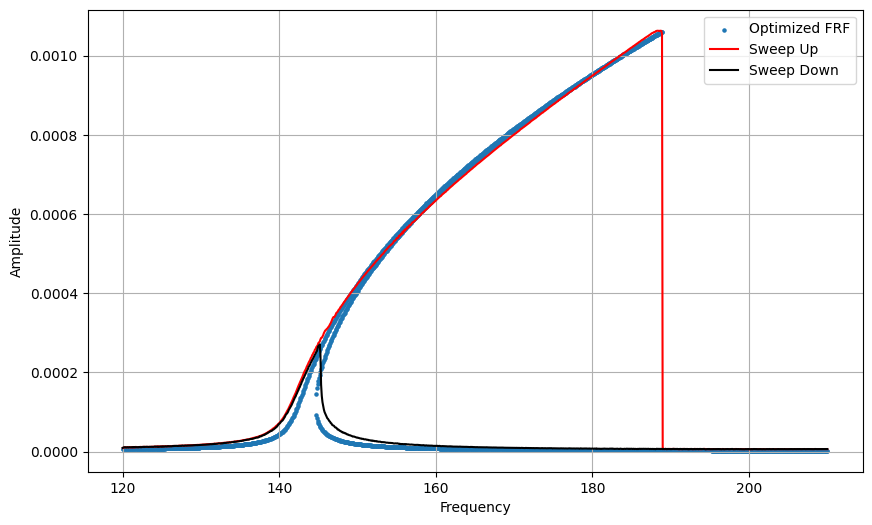

In [20]:
f1, a1 = get_frf(freq_010g_mec, best[0] ,best[2], best[1]*0.1*9.81, best[3])

plt.figure(figsize=(10, 6))

plt.scatter(f1, a1,s=5, label = "Optimized FRF")
plt.plot(freq_010g_mec, amplitude_010g_mec_sweepup, label='Sweep Up', color='red')
plt.plot(freq_010g_mec, amplitude_010g_mec_sweepdown, label='Sweep Down', color = "black")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.grid(True)
plt.legend()
plt.show();